## Data Exploration

At the time of writing we have ~44,000,000 Dota 2 games. Let's look at:

 - When they were played
 - What heroes were played
 - What accounts played in these games

In [1]:
import os
import re
import json
import time
import tqdm
import datetime
import requests
import pandas as pd
import numpy as np
from os.path import exists
from collections import Counter

In [2]:
df = pd.read_csv("training_set_large.csv")
df

,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9,...,account_emb_0,account_emb_1,account_emb_2,account_emb_3,account_emb_4,account_emb_5,account_emb_6,account_emb_7,account_emb_8,account_emb_9
0,72,49,51,123,29,10,88,53,13,68,...,1883971,1414290,247747,89546,243067,1673428,1716798,956937.0,46753,237495
1,62,25,2,67,48,32,54,71,94,9,...,2610116,376426,2610116,2610116,2610116,2109149,2610116,1460359.0,1998891,2610116
2,42,32,14,35,26,79,110,70,11,93,...,2610116,197001,488226,2049344,2610116,2610116,2610116,455643.0,2610116,2610116
3,25,18,5,75,11,22,1,62,119,35,...,2610116,2610116,411178,1592200,2610116,1432264,2610116,846052.0,2610116,1899964
4,47,14,8,112,68,67,40,29,126,55,...,1904429,2099034,793212,2610116,603621,1113243,769555,869102.0,738725,1803248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44567612,81,64,50,8,121,41,128,47,62,99,...,974626,233390,2610116,970286,235521,1166843,2610116,2610116.0,2610116,2610116
44567613,4,11,33,5,53,34,35,27,84,54,...,848265,2292369,2610116,2610116,555915,1478046,548899,2610116.0,2610116,2610116
44567614,80,50,12,18,47,114,25,62,26,10,...,2610116,2610116,2610116,2610116,2610116,1073160,2610116,2610116.0,2610116,674953
44567615,73,51,56,103,104,4,8,15,25,9,...,2610116,2185322,2610116,2610116,2610116,2350846,1177136,2610116.0,658841,2165237


### When were these games played?

array([[<AxesSubplot:title={'center':'start_time'}>]], dtype=object)

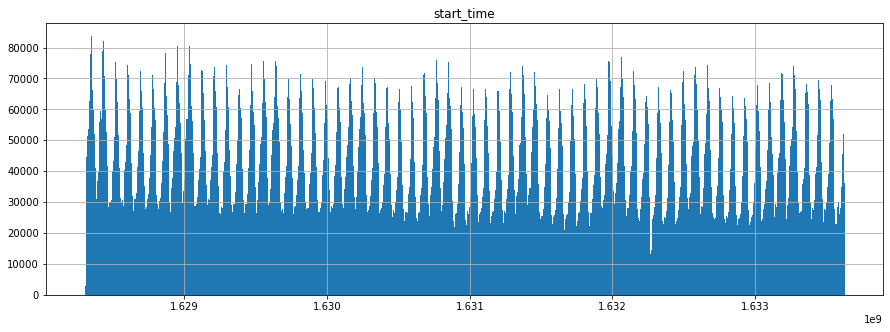

In [15]:
df.hist(column=["start_time"], bins=1000, figsize=(15,5))

Looks like it rises and falls daily.

In [6]:
df['date'] = pd.to_datetime(df['start_time'],unit='s')

array([[<AxesSubplot:title={'center':'date'}>]], dtype=object)

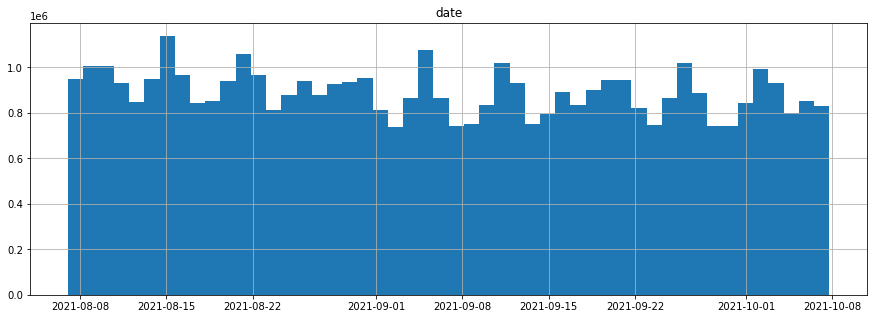

In [14]:
df.hist(column=["date"], bins=50, figsize=(15,5))

We have data from August 8, 2021 - October 8, 2021

### Who are the most played characters?

In [21]:
c = Counter()
for i in range(0,10):
  key = 'hero'+str(i)
  cur_counter = Counter(df[key])
  c = c + cur_counter

In [23]:
c.most_common()

[(14, 13284870),
 (26, 9912380),
 (35, 9679807),
 (84, 8740996),
 (74, 8298856),
 (8, 8078678),
 (93, 7582451),
 (21, 7501756),
 (44, 7482587),
 (75, 7270811),
 (11, 7010211),
 (104, 6499865),
 (25, 6250195),
 (27, 5661069),
 (99, 5632923),
 (86, 5617045),
 (9, 5605607),
 (114, 5571769),
 (22, 5551152),
 (2, 5500873),
 (1, 5399388),
 (30, 5315468),
 (41, 5304800),
 (6, 5277623),
 (71, 5232702),
 (48, 5179483),
 (42, 5064664),
 (7, 4962989),
 (101, 4910037),
 (47, 4872442),
 (67, 4821502),
 (5, 4685056),
 (18, 4628779),
 (123, 4537892),
 (34, 4533605),
 (105, 4414483),
 (62, 4396720),
 (94, 4290208),
 (50, 4231589),
 (16, 4204668),
 (68, 4185130),
 (17, 4087681),
 (63, 4070413),
 (39, 4056492),
 (20, 3978957),
 (64, 3913845),
 (12, 3903165),
 (54, 3832024),
 (70, 3817643),
 (40, 3746350),
 (32, 3575015),
 (56, 3569059),
 (121, 3546847),
 (23, 3502385),
 (59, 3474523),
 (29, 3458210),
 (36, 3425819),
 (72, 3409688),
 (10, 3401323),
 (90, 3386203),
 (31, 3363855),
 (119, 3359302),
 (28, 3

These align roughly correctly with:
 - Patch 7.30: https://www.dotabuff.com/heroes/winning?date=patch_7.30
 - Heros list: https://gist.github.com/twisterghost/68cc46b435a44898b35bee383bd69f9b

## Who played the most Dota 2 in this time period?

In [25]:
c = Counter()
for i in range(0,10):
  key = 'account'+str(i)
  cur_counter = Counter(df[key])
  c = c + cur_counter

In [26]:
c.most_common()

[(4294967295, 256041376),
 (1028549601, 1623),
 (347567576, 1371),
 (388502705, 1240),
 (144408963, 1224),
 (175855450, 1186),
 (906486130, 1167),
 (1021851709, 1130),
 (298295126, 1124),
 (120187145, 1090),
 (140900168, 1069),
 (204267145, 1064),
 (926357447, 1052),
 (173631721, 1043),
 (118970678, 1030),
 (319788185, 1013),
 (60980377, 999),
 (328048844, 981),
 (143808559, 978),
 (157300885, 976),
 (427976805, 972),
 (116852949, 970),
 (153045361, 968),
 (874592091, 961),
 (298700655, 959),
 (200031291, 952),
 (166405296, 949),
 (203220420, 948),
 (1216924077, 948),
 (203565875, 944),
 (1102479427, 941),
 (216510451, 941),
 (294220134, 937),
 (1146500100, 936),
 (136708596, 930),
 (138093288, 929),
 (292748332, 926),
 (1126209423, 921),
 (1042869413, 916),
 (136520611, 916),
 (372105535, 914),
 (892260964, 911),
 (128908550, 910),
 (139787249, 907),
 (449104563, 907),
 (99168583, 895),
 (196366182, 891),
 (223089947, 888),
 (155675428, 882),
 (342171347, 880),
 (371092842, 878),
 (13

In [31]:
len(c.most_common())

2626898

In [36]:
c.most_common()[-1000000:-999000]

[(83283111, 24),
 (246366076, 24),
 (233122318, 24),
 (1024014565, 24),
 (155585793, 24),
 (121538200, 24),
 (323890292, 24),
 (121472503, 24),
 (213686483, 24),
 (991132420, 24),
 (264737324, 24),
 (140508532, 24),
 (82907014, 24),
 (138685062, 24),
 (81753358, 24),
 (140882514, 24),
 (1245765078, 24),
 (138919665, 24),
 (139307665, 24),
 (398115919, 24),
 (210964750, 24),
 (220602755, 24),
 (86449837, 24),
 (219175385, 24),
 (106376687, 24),
 (238512242, 24),
 (209022395, 24),
 (341045990, 24),
 (1205669354, 24),
 (129026676, 24),
 (327474701, 24),
 (138549055, 24),
 (258279637, 24),
 (108924256, 24),
 (321359955, 24),
 (236090591, 24),
 (124190672, 24),
 (230600693, 24),
 (112129701, 24),
 (106961620, 24),
 (164476294, 24),
 (376321516, 24),
 (162455428, 24),
 (12876086, 24),
 (246848217, 24),
 (66767184, 24),
 (986387928, 24),
 (173941091, 24),
 (218450751, 24),
 (64175800, 24),
 (335016693, 24),
 (196298709, 24),
 (140807531, 24),
 (113484532, 24),
 (149972902, 24),
 (1111997765, 

So it looks like there are over a million players who have played more than 25 games in these two months. 

We can probably use `25` as an arbitrary threshold where we map players who have played less to the anonymous ID.

All others can be mapped to their ID and we can create an embedding for them.

Maybe we need more than that? Maybe we need 100 games?

## Mapping PlayerIds to an EmbeddingID

We might have enough games to benefit from adding an embedding for our players to our model. Let's start to think about what it should look like. Let's find the min and max player IDs

In [3]:
all_ids = np.concatenate((df['account0'].values, df['account1'].values, df['account2'].values,
                    df['account3'].values, df['account4'].values, df['account5'].values,
                    df['account6'].values, df['account7'].values, df['account8'].values,
                    df['account9'].values), axis=0)
unique_ids = sorted(np.unique(all_ids))

In [4]:
# Smallest 5 IDs
unique_ids[:5]

[282, 343, 695, 1985, 2776]

The first corresponds to this player: https://dotabuff.com/players/282

They have been playing since before Dota 2 released publically.

In [5]:
unique_ids[-5:]

[1253517033, 1253539541, 1253561194, 1253684682, 4294967295]

`4294967295` corresponds to INT_MAX and is the placeholder for "anonymous" player.

`1253684682` represents a real player that created their account on October 7, 2021. This looks like a legitimate player and a sign that everything is correct.

In [6]:
# Make a lookup that matches each sorted, unique ID to an embedding table entry
lookup = {}
for i, account in enumerate(unique_ids):
  lookup[account] = i

In [7]:
df['account_emb_0'] = df['account0'].apply(lookup.get).astype('uint32')
df['account_emb_1'] = df['account1'].apply(lookup.get).astype('uint32')
df['account_emb_2'] = df['account2'].apply(lookup.get).astype('uint32')
df['account_emb_3'] = df['account3'].apply(lookup.get).astype('uint32')
df['account_emb_4'] = df['account4'].apply(lookup.get).astype('uint32')
df['account_emb_5'] = df['account5'].apply(lookup.get).astype('uint32')
df['account_emb_6'] = df['account6'].apply(lookup.get).astype('uint32')
df['account_emb_7'] = df['account7'].apply(lookup.get).astype('uint32')
df['account_emb_8'] = df['account8'].apply(lookup.get).astype('uint32')
df['account_emb_9'] = df['account9'].apply(lookup.get).astype('uint32')

In [9]:
df['hero0'] = df['hero0'].astype(dtype='uint32')
df['hero1'] = df['hero1'].astype(dtype='uint32')
df['hero2'] = df['hero2'].astype(dtype='uint32')
df['hero3'] = df['hero3'].astype(dtype='uint32')
df['hero4'] = df['hero4'].astype(dtype='uint32')
df['hero5'] = df['hero5'].astype(dtype='uint32')
df['hero6'] = df['hero6'].astype(dtype='uint32')
df['hero7'] = df['hero7'].astype(dtype='uint32')
df['hero8'] = df['hero8'].astype(dtype='uint32')
df['hero9'] = df['hero9'].astype(dtype='uint32')

In [11]:
df['account0'] = df['account0'].astype(dtype='uint32')
df['account1'] = df['account1'].astype(dtype='uint32')
df['account2'] = df['account2'].astype(dtype='uint32')
df['account3'] = df['account3'].astype(dtype='uint32')
df['account4'] = df['account4'].astype(dtype='uint32')
df['account5'] = df['account5'].astype(dtype='uint32')
df['account6'] = df['account6'].astype(dtype='uint32')
df['account7'] = df['account7'].astype(dtype='uint32')
df['account8'] = df['account8'].astype(dtype='uint32')
df['account9'] = df['account9'].astype(dtype='uint32')

In [12]:
df.dtypes

hero0              int32
hero1              int32
hero2              int32
hero3              int32
hero4              int32
hero5              int32
hero6              int32
hero7              int32
hero8              int32
hero9              int32
account0           int32
account1           int32
account2           int32
account3           int32
account4           int32
account5           int32
account6           int32
account7           int32
account8           int32
account9           int32
start_time         int64
radiant_win      float64
account_emb_0      int32
account_emb_1      int32
account_emb_2      int32
account_emb_3      int32
account_emb_4      int32
account_emb_5      int32
account_emb_6      int32
account_emb_7      int32
account_emb_8      int32
account_emb_9      int32
dtype: object

In [13]:
df.head()

,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9,...,account_emb_0,account_emb_1,account_emb_2,account_emb_3,account_emb_4,account_emb_5,account_emb_6,account_emb_7,account_emb_8,account_emb_9
0,72,49,51,123,29,10,88,53,13,68,...,1895742,1423076,249414,90182,244701,1683811,1727488,962897,47099,239083
1,62,25,2,67,48,32,54,71,94,9,...,2626897,378928,2626897,2626897,2626897,2122413,2626897,1469421,2011431,2626897
2,42,32,14,35,26,79,110,70,11,93,...,2626897,198325,491378,2062187,2626897,2626897,2626897,458612,2626897,2626897
3,25,18,5,75,11,22,1,62,119,35,...,2626897,2626897,413893,1602078,2626897,1441156,2626897,851299,2626897,1911839
4,47,14,8,112,68,67,40,29,126,55,...,1916331,2112227,798162,2626897,607494,1120151,774373,874511,743367,1814503


In [14]:
df.to_csv("training_set_large.csv", index=False)